Name: Zachary Laird

Labpartner(s): Sharmin Siddika, Fahmida Akhter, Israt Tama

In [3]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rand

# Class 12.1

# Warmups 12.1

Note: finish this for lab if you don't finish in class.

Log into the Supermike III LSU HPC using ssh (in the terminal)

**W.1.** Last time we went over the following basic unix/linux commands:
- ls
- pwd
- cd
- scp
- scp -r

What do each of these do? If you forgot, you can type "man ls", etc. to see the documentation.

- ls displays your directory and shows you what you currently have open in your directory.
- pwd displays the full name of your working directory
- cd changes your current directory to a different directory
- scp is a secure copy path. It transfers a secure file to a new path in a directory.
- scp -r copies the entire directory and allows you to transfer the entire directory

**W.2** Navigate to your /work/user directory on mike. Move a copy of your final project proposal from your computer to your work directory and submit a screen shot of this directory with the file with your lab.

In [9]:
##done

**W.3** Look up the LSU HPC documentation for /work and /home, what is the difference? What are the quotas for each? How long will files last? Are they backed up?

- For the home directory this is good for Code in development, compiled executables. For the work directory this is good for Job input/output. Quota for home: 10 GB Quota for work: Unlimited. Time to last: home = forever work = 60 days. The files imn the home directory are backed up, those in the work are not. 

# Lecture 12.1

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- basic line fitting
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/Sci_comp_F24/blob/main/Course_materials/movie_demo_2024.ipynb

In [15]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [17]:
date1 = datetime(1996,1,1) 

In [18]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [19]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [20]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m/%d/%Y")

'01/01/1996'

In [21]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [22]:
print(date2)

1996-01-01 13:34:06


In [23]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [24]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2024, 11, 28, 15, 38, 7, 24822)

#### If we want to increment the date we can use timedelta

In [26]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [27]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [28]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [30]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [32]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable | None' = None,
    inclusive: 'IntervalClosedType' = 'both',
    *,
    unit: 'str | None' = None,
    **kwargs,
) -> 'DatetimeIndex'
Docstring:
Return a fixed frequency DatetimeIndex.

Returns the range of equally spaced time points (where the difference between any
two adjacent points is specified by the given frequency) such that they all
satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
the first and last time points in that range that fall on the boundary of ``freq``
(if given as a frequency string) or that are valid for ``freq`` (if given as a
:class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
``end``, or ``freq`` is *not* specified, this missing parameter can be computed
given ``periods``, the number of timesteps in the range. See the note below.)

Parameters
----------
st

In [33]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [34]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00')

In [36]:
print(my_daterange[1])

2018-01-02 00:00:00


In [37]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [38]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '12/1/2021', freq='ME')
my_daterange2

ValueError: Invalid frequency: ME

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [60]:
sst= pd.read_csv("https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 247: invalid start byte

In [ ]:
https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv

In [66]:
sst= pd.read_csv('https://www.epa.gov/system/files/other-files/2024-06/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [68]:
sst

,"Figure 1. Average Global Sea Surface Temperature, 1880-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2024",NaN,NaN,NaN
2,Web update: June 2024,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
145,2019,0.878,0.822,0.935
146,2020,0.846,0.804,0.888
147,2021,0.668,0.622,0.714
148,2022,0.743,0.701,0.786


In [70]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [72]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<Axes: xlabel='Year'>

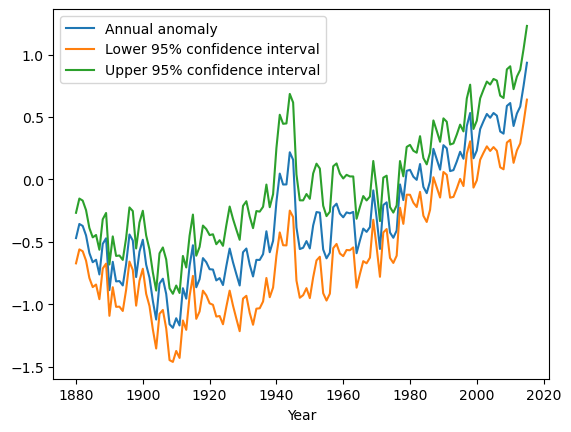

In [74]:
sst.plot()

In [76]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<Axes: xlabel='Year'>

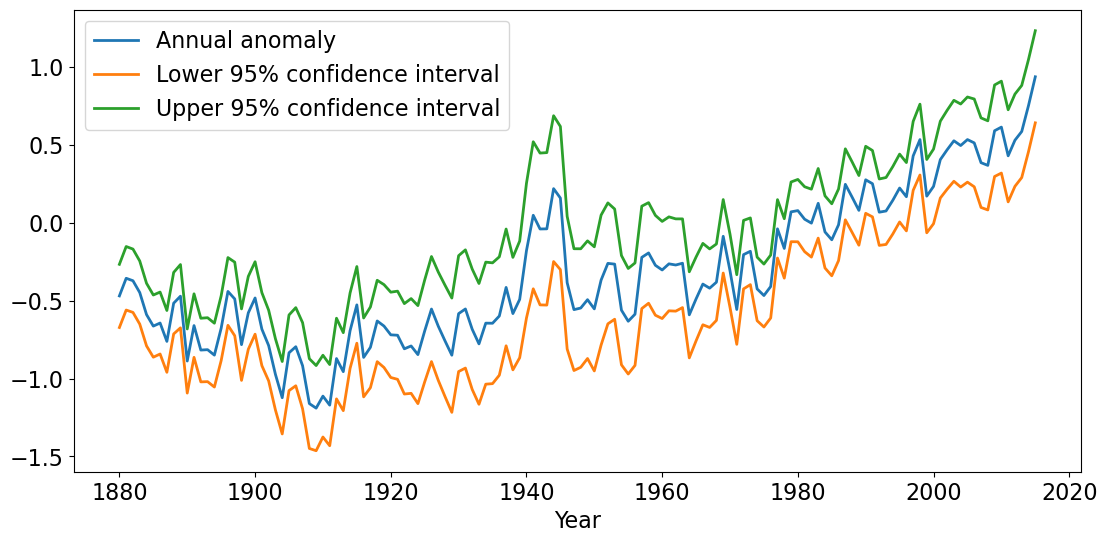

In [78]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [80]:
import xarray as xr

In [82]:
sst_ds = sst.to_xarray()

In [84]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [94]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [96]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [98]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

Linear regression is simply fitting a line to some data, assuming that the data is on a straight line with the equation y=**m**x+**b**, where x and y are the independent and dependent data, **m** is the slope, and **b** is the intercept. Linear regression finds m and b by minimizing the distance of all the data points to a line, getting the best fit, using calculus. See:

https://plainenglish.io/blog/linear-regression-for-dummies

https://en.wikipedia.org/wiki/Linear_regression


In [101]:
from scipy import stats

In [102]:
stats.linregress?

Signature: stats.linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are available:

    * 'two-sided': the slope of the regression line is nonzero
    * 'less': the slope of the regression line is less than zero
    * 'greater':  the slope of the regression line is greater than zero

    .. versionadded:: 1.7.

In [105]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [107]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704, intercept_stderr=1.104806345521059)

In [109]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- Rate that temperature is increasing (degrees F/Year)

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?
- x is time
- y is temprature

In [112]:
import matplotlib.pyplot as plt

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\zlaird1\AppData\Local\Temp\ipykernel_20376\1318780478.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('SSTA ($\degree$F)')


Text(0, 0.5, 'SSTA ($\\degree$F)')

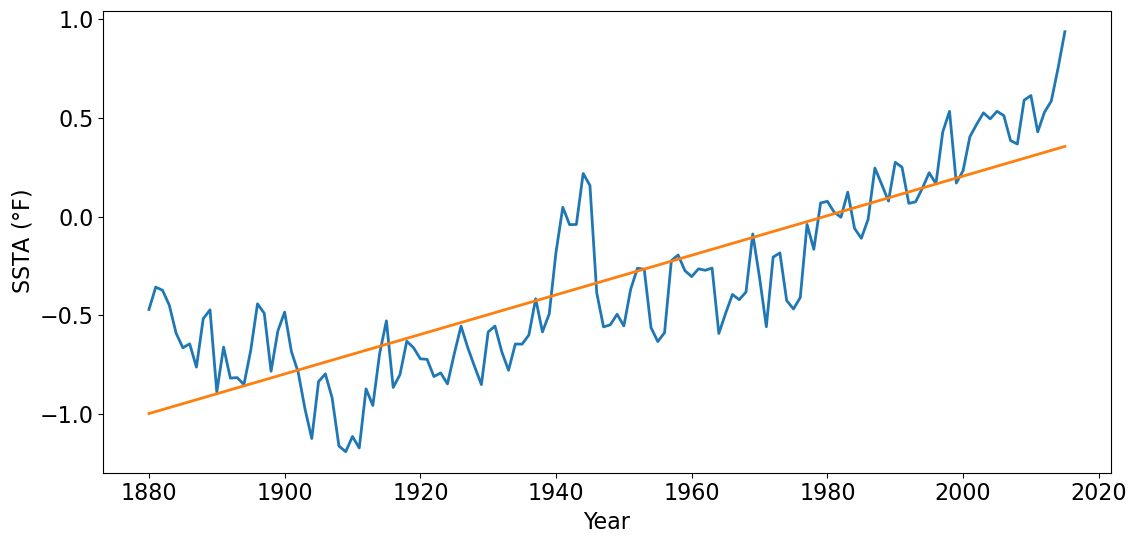

In [114]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

How good of a fit is this for the last few decades?
It's not so good, the trend is faster, steeper

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [117]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [119]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [121]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [123]:
ssta_trend_1980_on

LinregressResult(slope=0.020711260308880312, intercept=-41.05951991698843, rvalue=0.8829830021529423, pvalue=1.0383113887943806e-12, stderr=0.0018882626420977894, intercept_stderr=3.7718556347573635)

In [125]:
ssta_trend_1980_on.slope # 0.02 F/ year. 0.2 F /10 years

0.020711260308880312

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\zlaird1\AppData\Local\Temp\ipykernel_20376\4181170074.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('SSTA ($\degree$F)')


Text(0, 0.5, 'SSTA ($\\degree$F)')

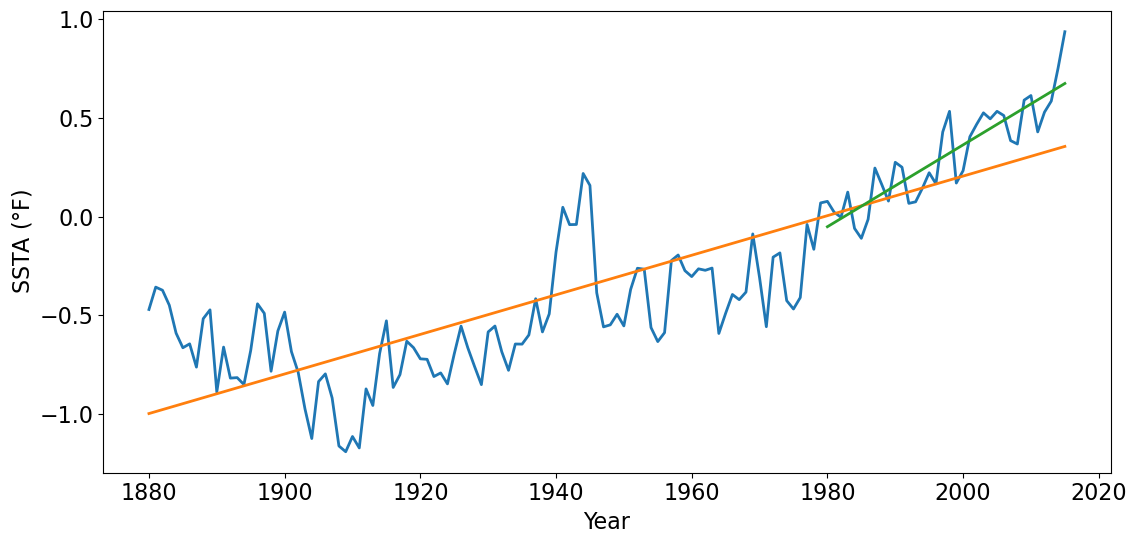

In [127]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [131]:
# First I am going to make the line, as I plotted before
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept


In [133]:
# Then I will subtract the trend, the line
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

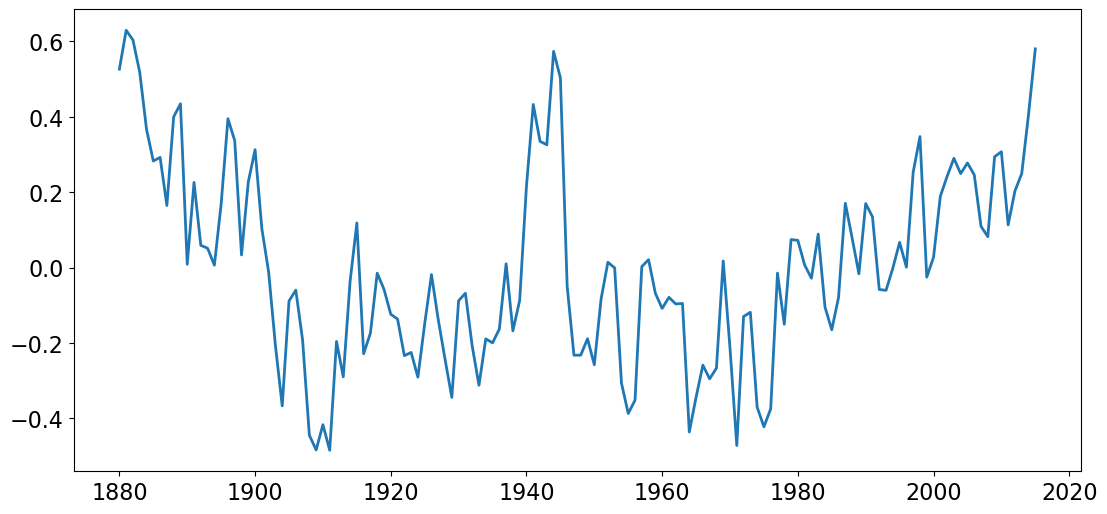

In [135]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year


pseudo code:

create an array to save the new data in

Loop through all the years
 take a mean of the current, previous and next years, save to some new arrray


In [137]:
import numpy as np

In [139]:
sst_ds["Annual anomaly"].shape

(136,)

In [141]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3


In [143]:
ssta_filtered

array([ 0.       , -0.3998496, -0.392661 , -0.470286 , -0.5672838,
       -0.6324492, -0.689739 , -0.6407322, -0.58335  , -0.6253368,
       -0.6732342, -0.7884066, -0.7641546, -0.8273058, -0.7806204,
       -0.656106 , -0.5359902, -0.571089 , -0.6169062, -0.6148638,
       -0.5817162, -0.6515784, -0.8148972, -0.9615408, -0.9770328,
       -0.9178932, -0.8494422, -0.958077 , -1.089387 , -1.154415 ,
       -1.1577162, -1.0517418, -0.9994074, -0.8402694, -0.7254816,
       -0.6950514, -0.7305318, -0.7649316, -0.697887 , -0.6712272,
       -0.7017474, -0.7504014, -0.7741902, -0.8156208, -0.7774104,
       -0.6984828, -0.6376662, -0.6591012, -0.7577646, -0.730929 ,
       -0.6625068, -0.6069534, -0.671682 , -0.7020222, -0.689259 ,
       -0.6296118, -0.5532168, -0.5326164, -0.4971444, -0.4185516,
       -0.2083398, -0.0577464, -0.0110928,  0.045882 ,  0.1120092,
       -0.0031734, -0.2618532, -0.4970154, -0.5332902, -0.5316978,
       -0.4719516, -0.3943236, -0.2986428, -0.3629202, -0.4866

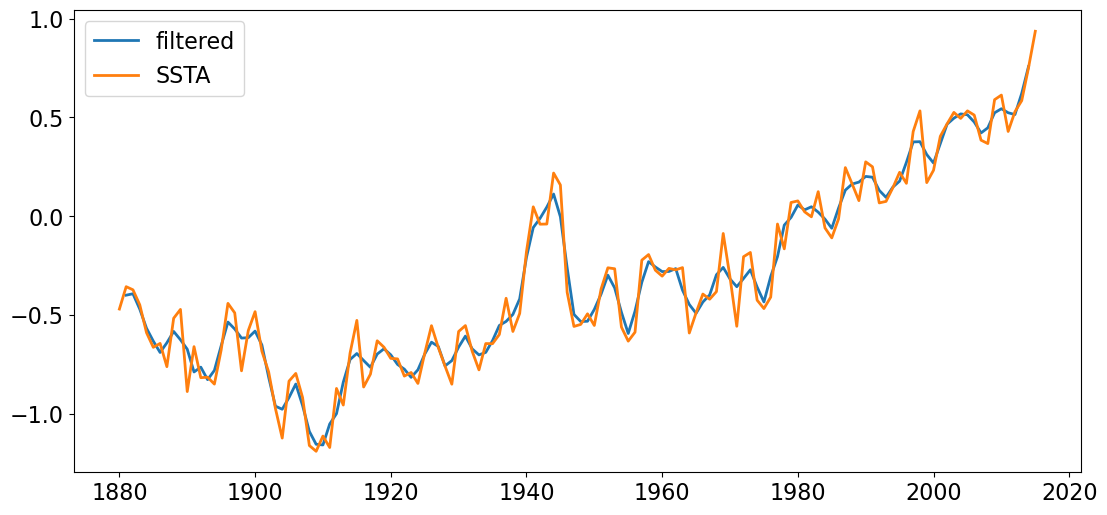

In [145]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.1

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [147]:
bday = datetime(2000,9,1) 
bday

datetime.datetime(2000, 9, 1, 0, 0)

In [149]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __bool__(self, /)
 |      True if self else False
 |
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |      Return hash(self).
 |
 |  __le__(self, value, /)
 |   

In [151]:
print('Birthday: '+bday.strftime("%m/%d/%Y %H:%M:%S"))

Birthday: 09/01/2000 00:00:00


In [153]:
tenplus_bday = bday+timedelta(days = 70)

In [155]:
print('Birthday plus 10 Weeks: '+tenplus_bday.strftime("%m/%d/%Y %H:%M:%S"))

Birthday plus 10 Weeks: 11/10/2000 00:00:00


In [157]:
bdayfivemin = bday + timedelta(minutes = 5)

In [159]:
print('Birthday plus 5 minutes: '+bdayfivemin.strftime("%m/%d/%Y %H:%M:%S"))

Birthday plus 5 minutes: 09/01/2000 00:05:00


In [161]:
bdaytwoyears = bday + timedelta(days = 2*365)

In [163]:
print('Birthday plus 2 Years: '+bdaytwoyears.strftime("%m/%d/%Y %H:%M:%S"))

Birthday plus 2 Years: 09/01/2002 00:00:00


**E.2** Define a daterange for your birthday every year of your life

In [166]:
bdayto24 = pd.date_range(start='09/01/2000',end = '09/01/2024', freq='AS-SEP') 

In [168]:
bdayto24

DatetimeIndex(['2000-09-01', '2001-09-01', '2002-09-01', '2003-09-01',
               '2004-09-01', '2005-09-01', '2006-09-01', '2007-09-01',
               '2008-09-01', '2009-09-01', '2010-09-01', '2011-09-01',
               '2012-09-01', '2013-09-01', '2014-09-01', '2015-09-01',
               '2016-09-01', '2017-09-01', '2018-09-01', '2019-09-01',
               '2020-09-01', '2021-09-01', '2022-09-01', '2023-09-01',
               '2024-09-01'],
              dtype='datetime64[ns]', freq='AS-SEP')

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [171]:
reformat =  [date.strftime("%m-%d-%Y") for date in bdayto24]
reformat

['09-01-2000',
 '09-01-2001',
 '09-01-2002',
 '09-01-2003',
 '09-01-2004',
 '09-01-2005',
 '09-01-2006',
 '09-01-2007',
 '09-01-2008',
 '09-01-2009',
 '09-01-2010',
 '09-01-2011',
 '09-01-2012',
 '09-01-2013',
 '09-01-2014',
 '09-01-2015',
 '09-01-2016',
 '09-01-2017',
 '09-01-2018',
 '09-01-2019',
 '09-01-2020',
 '09-01-2021',
 '09-01-2022',
 '09-01-2023',
 '09-01-2024']

**E.4** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [173]:
sst_ds.Year[60:91]

<xarray.DataArray 'Year' (Year: 31)>
array([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970], dtype=int64)
Coordinates:
  * Year     (Year) int64 1940 1941 1942 1943 1944 ... 1966 1967 1968 1969 1970

In [175]:
regress = stats.linregress(sst_ds.Year[60:90], sst_ds["Annual anomaly"][60:90])

In [181]:
regress

LinregressResult(slope=-0.00902015399332592, intercept=17.322976879955508, rvalue=-0.3527744009853819, pvalue=0.05586207746180094, stderr=0.004521456994281124, intercept_stderr=8.837274349409372)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\zlaird1\AppData\Local\Temp\ipykernel_20376\2844493490.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Sea Surface Temp Anomaly ($\degree$F)')


Text(0, 0.5, 'Sea Surface Temp Anomaly ($\\degree$F)')

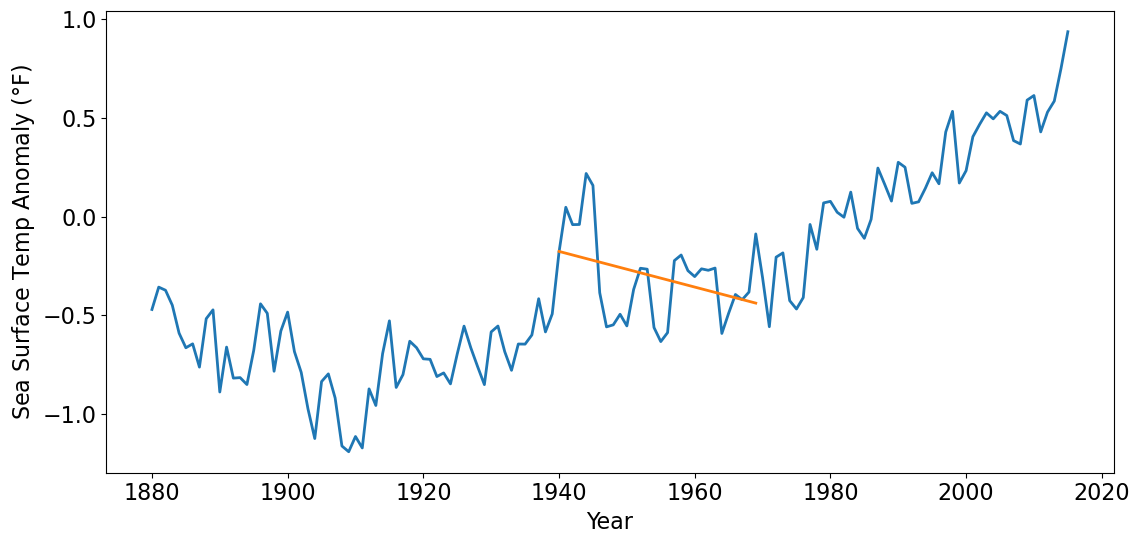

In [179]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year[60:90], regress.slope*sst_ds.Year[60:90] + regress.intercept)
plt.xlabel('Year')
plt.ylabel('Sea Surface Temp Anomaly ($\degree$F)')

In [ ]:
#The trend is negative, I am not very confident in this result due to it's rvalue of -0.3527744009853819
#The pvalue of 0.055 is an indication that the statistical significance is not significant but relatively close to
#being significant.

**E.5** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

According to the internet during 1940 through 1970 there were ongoing war efforts. There was a world war, vietnam, korea, and multiple other large scale war efforts due to the cold war. During all of this industrial emissions increased resulting in an increase in aerosols like soot and sulfates. It is theorized that due to these sulfate aerosols the sea surface temperatures dropped. 

Source: Earth’s Temperature Tracker. (2007, November 5). [Text.Article]. NASA Earth Observatory. https://earthobservatory.nasa.gov/features/GISSTemperature/giss_temperature4.php

**E.6** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

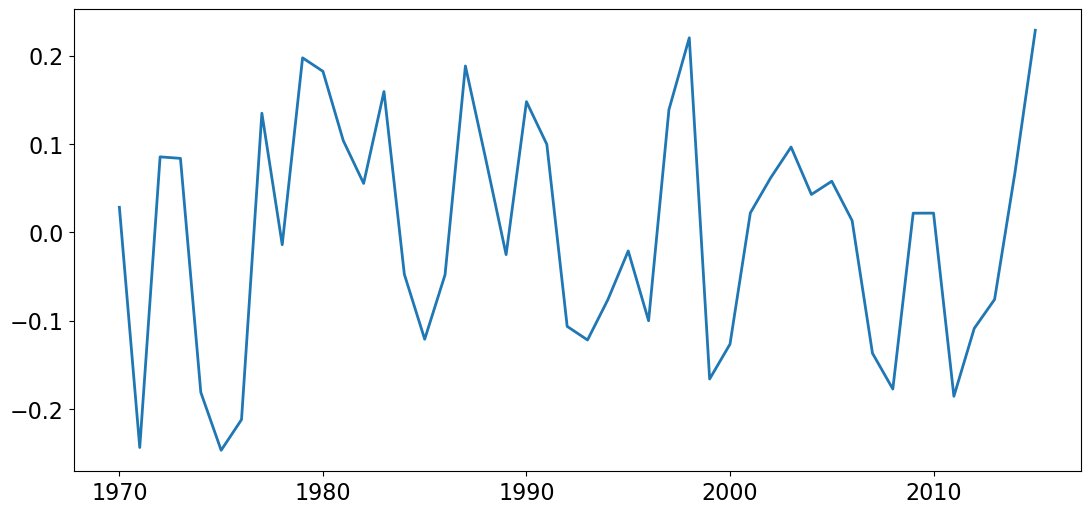

In [184]:
on1970 =stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])
trend = on1970.slope*sst_ds.Year[90:] + on1970.intercept

sston1970=sst_ds["Annual anomaly"][90:]
sst_detrend = sst_ds["Annual anomaly"][90:] - trend

plt.plot(sst_ds.Year[90:], sst_detrend)


The ENSO varies every 2-7 years, so due to this you can see that reflected in the anomalies and their frequency of anomalies. 

**E.7** Perform a five year moving average of your detrended data from E.6. Explain your result in relation to the periodicity of ENSO.

In [187]:
filtered = np.zeros(len(sst_detrend))
filtered

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [189]:
for i in range(len(sst_detrend)-2): 
    filtered[i+1] = (sst_detrend[i] + sst_detrend[i+1] + sst_detrend[i+2])/3

In [191]:
len(sst_ds.Year[90:])

46

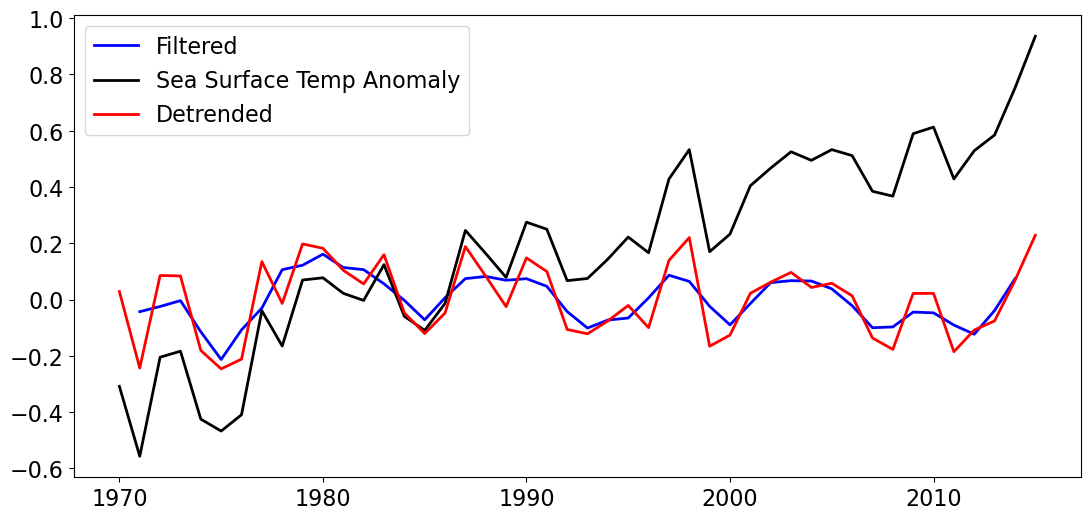

In [195]:
plt.plot(sst_ds.Year[91:-1],filtered[1:-1], label = "Filtered", color = 'blue')
plt.plot(sst_ds.Year[90:],sst_ds["Annual anomaly"][90:], label = 'Sea Surface Temp Anomaly', color = 'black')
plt.plot(sst_ds.Year[90:], sst_detrend, label = "Detrended", color = 'red')
plt.legend()

Looking at the filtered line and the detrended you can see that about every 5 years the sst varies. This fits in the range of ENSO occurences. 

**Notes** Make notes for yourself on progamming tecniques and commands you learned in the this week, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.